<a href="https://colab.research.google.com/github/MelloFernanda/eda-detection/blob/main/eda_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANÁLISE EXPLORATÓRIA DE DADOS (EDA) E DETECÇÃO DE FRAUDES**

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import seaborn as sns
sns.set_style("dark")

from sklearn import preprocessing
from scipy.stats import skew, boxcox
from scipy import stats

from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [ ]:
loc_dataset="/content/EAD/dados_eda_card.csv"

In [ ]:
df = pd.read_csv(loc_dataset)

# Criando funções

In [ ]:
# Função para obter a data e hora atual formatada
def now():
    tmp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    return tmp

# Função para ler um arquivo e exibir informações sobre o DataFrame resultante
def my_file_read(df):
    print("{}: {} tem {} observações e {} colunas".format(now(), df, df.shape[0], df.shape[1]))
    print("{}: Verificação de nomes das colunas::: {}".format(now(), df.columns.tolist()))

# Função definida para ler um DataFrame e encontrar dados ausentes nas colunas e a quantidade de dados ausentes
def checking_na(df):
    try:
        if (isinstance(df, pd.DataFrame)):
            df_na_bool = pd.concat([df.isnull().any(), df.isnull().sum(), (df.isnull().sum()/df.shape[0])*100],
                                   axis=1, keys=['df_bool', 'df_amt', 'missing_ratio_percent'])
            df_na_bool = df_na_bool.loc[df_na_bool['df_bool'] == True]
            return df_na_bool
        else:
            print("{}: O input não é um DataFrame do pandas".format(now()))

    except (UnboundLocalError, RuntimeError):
        print("{}: Algo deu errado".format(now()))

#Verificando os dados ausentes

In [ ]:
raw_data = my_file_read(df)

2023-12-20 02:06:02:          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1           

In [ ]:
print(checking_na(df))

Empty DataFrame
Columns: [df_bool, df_amt, missing_ratio_percent]
Index: []


#Olhada na amostra do conjunto de dados

In [ ]:
print(df.head(5))

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


## Análise Exploratória de Dados (EDA)

Entendendo melhor os dados.

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


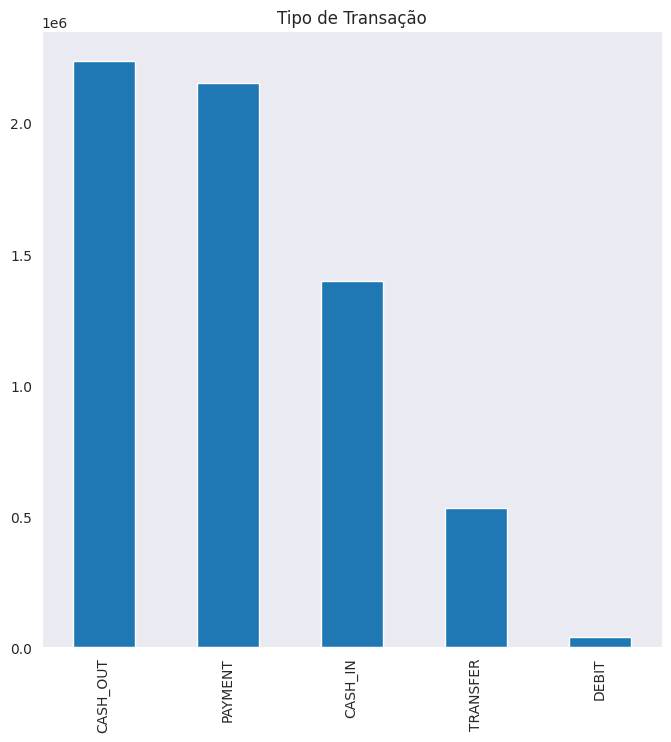

In [ ]:
print(df.type.value_counts())

f, ax = plt.subplots(1, 1, figsize=(8, 8))
df.type.value_counts().plot(kind='bar', title="Tipo de Transação", ax=ax, figsize=(8,8))
plt.show()

A partir da simulação, existem 5 tipos de transações conforme ilustrado acima.

Existem 2 indicadores se destacam e é interessante investigar:
as colunas isFraud e isFlaggedFraud.

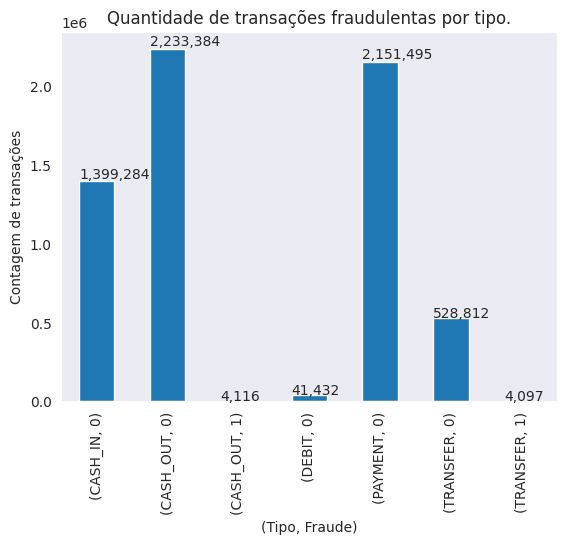

In [ ]:
# Agrupando os dados por tipo de transação e isFraud
grouped_data = df.groupby(['type', 'isFraud']).size()

# Plotando um gráfico de barras com o número de transações que são fraudes reais por tipo de transação
ax = grouped_data.plot(kind='bar')
ax.set_title("Quantidade de transações fraudulentas por tipo.")
ax.set_xlabel("(Tipo, Fraude)")
ax.set_ylabel("Contagem de transações")

# Adicionando rótulos com os valores de contagem em cada barra
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

plt.show()

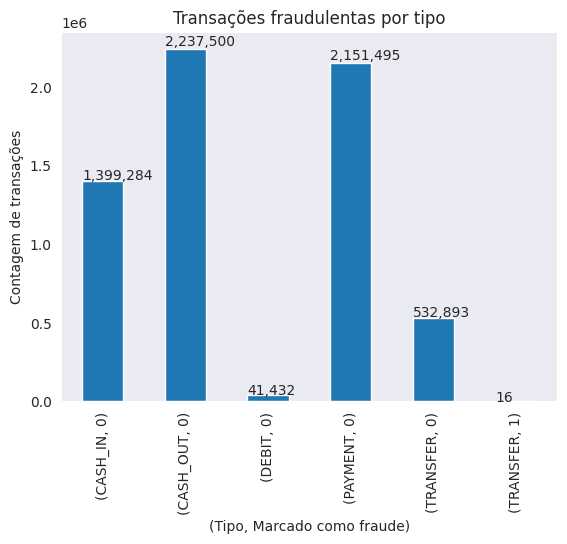

In [ ]:
ax = df.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar')
ax.set_title("Transações fraudulentas por tipo")
ax.set_xlabel("(Tipo, Marcado como fraude)")
ax.set_ylabel("Contagem de transações")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))



Parece que a simulação só consegue identificar 16 transações de transferência como fraudulentas.

Vamos examinar esses registros e compará-los com as transações que escapam da detecção do sistema [outlines].

#Analisando outlines

O gráfico a seguir se concentrará exclusivamente no tipo de transação de transferência.

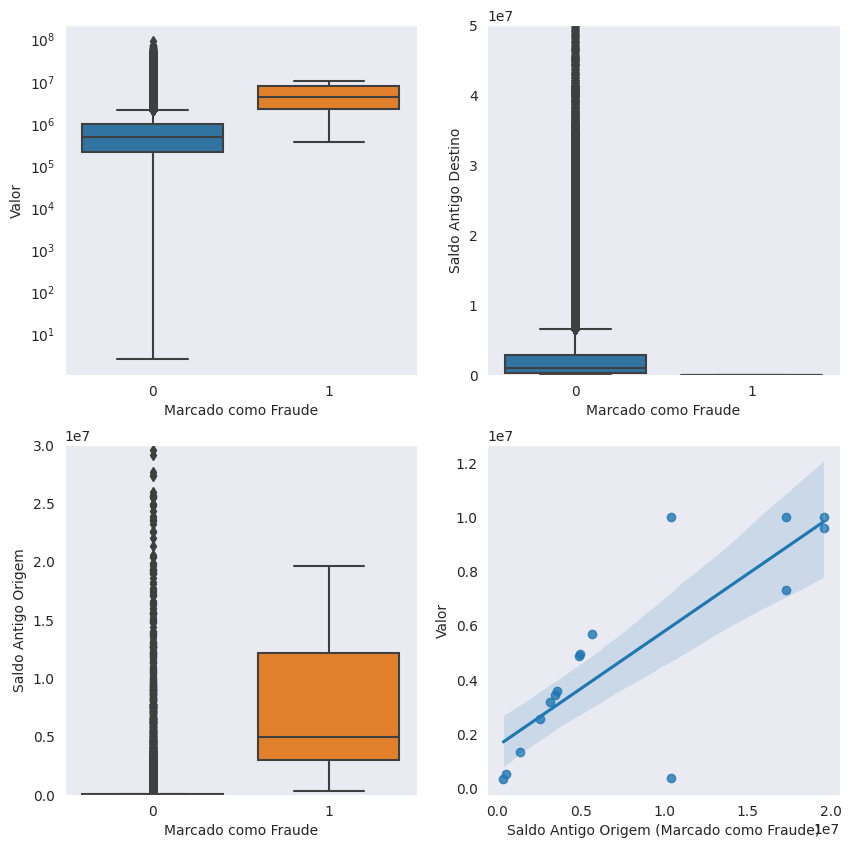

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
tmp = df.loc[(df.type == 'TRANSFER'), :]

a = sns.boxplot(x='isFlaggedFraud', y='amount', data=tmp, ax=axs[0][0])
axs[0][0].set_yscale('log')
a.set(xlabel='Marcado como Fraude', ylabel='Valor')

b = sns.boxplot(x='isFlaggedFraud', y='oldbalanceDest', data=tmp, ax=axs[0][1])
b.set(ylim=(0, 0.5e8))
b.set(xlabel='Marcado como Fraude', ylabel='Saldo Antigo Destino')

c = sns.boxplot(x='isFlaggedFraud', y='oldbalanceOrg', data=tmp, ax=axs[1][0])
c.set(ylim=(0, 3e7))
c.set(xlabel='Marcado como Fraude', ylabel='Saldo Antigo Origem')

d = sns.regplot(x='oldbalanceOrg', y='amount', data=tmp.loc[(tmp.isFlaggedFraud == 1), :], ax=axs[1][1])
d.set(xlabel='Saldo Antigo Origem (Marcado como Fraude)', ylabel='Valor')
plt.show()

# Modelagem

Nesta seção, focaremos apenas nos tipos de transação 'TRANSFER' e 'CASH_OUT', pois foram identificados como fraude.

1. Manter apenas os tipos de transação de interesse ('TRANSFER', 'CASH_OUT')
2. Remover algumas colunas
3. Converter variáveis categóricas em variáveis numéricas

#Manter transações de interesse

In [ ]:
# Importar a biblioteca pandas para substituir 'categorical' por 'get_dummies'
tmp = df.loc[(df['type'].isin(['TRANSFER', 'CASH_OUT'])), :]
tmp.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)
tmp = tmp.reset_index(drop=True)

# Convertendo a variável 'type' para numérica
tmp['type_num'] = tmp['type'].astype('category').cat.codes

print(tmp.head(3))

       type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0  TRANSFER     181.00          181.0             0.0             0.0   
1  CASH_OUT     181.00          181.0             0.0         21182.0   
2  CASH_OUT  229133.94        15325.0             0.0          5083.0   

   newbalanceDest  isFraud  type_num  
0            0.00        1         1  
1            0.00        1         0  
2        51513.44        0         0  


Vamos ver a correlação dos pontos de dados selecionados acima.


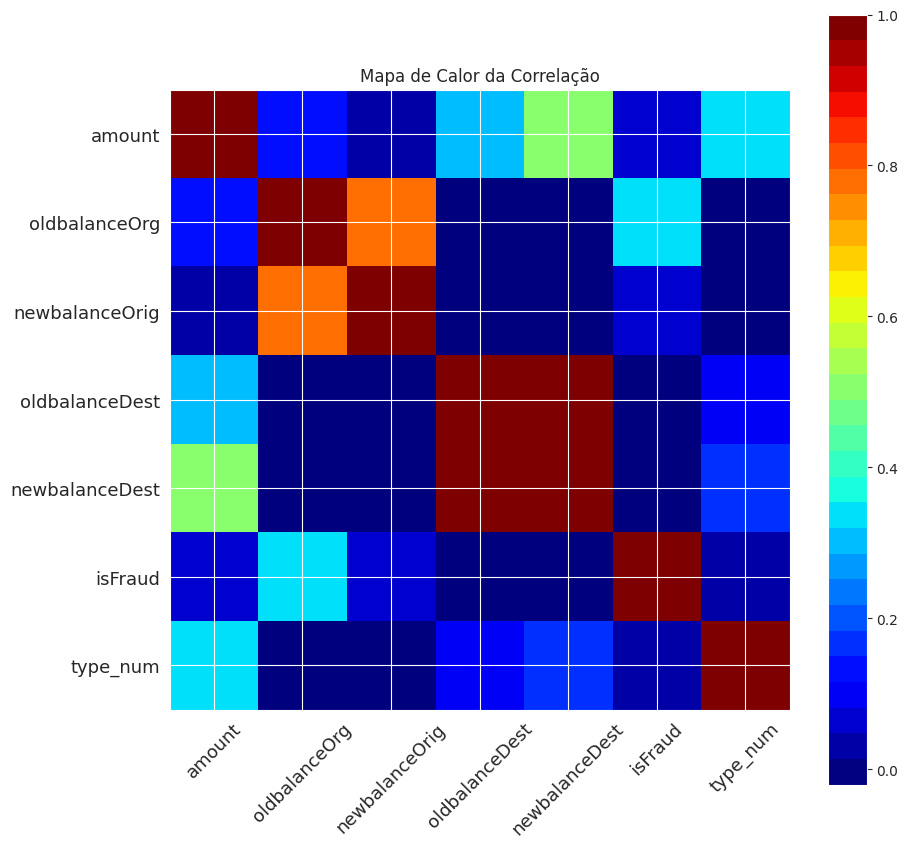

In [ ]:
def correlation_plot(df):
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation = "nearest", cmap = cmap)
    ax1.grid(True)
    plt.title("Mapa de Calor da Correlação")
    labels = df.columns.tolist()
    ax1.set_xticklabels(labels, fontsize=13, rotation=45)
    ax1.set_yticklabels(labels, fontsize=13)
    fig.colorbar(cax)
    plt.show()

correlation_plot(tmp)

<Axes: >

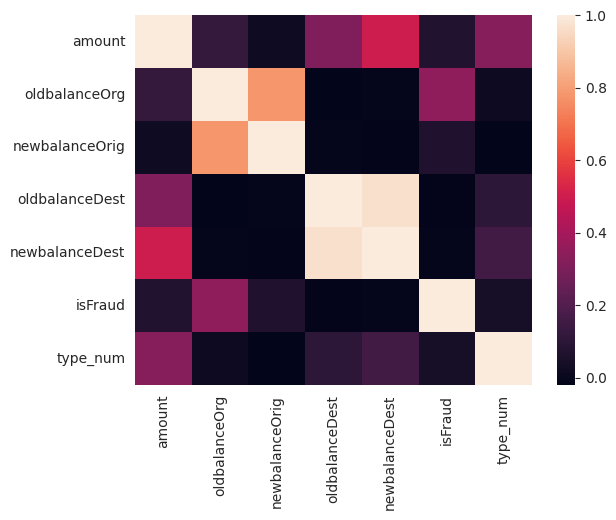

In [ ]:
# Alternativamente, tbm usamos o seaborn
# para plotar o mapa de calor

sns.heatmap(tmp.corr())

Obter rapidamente a contagem e a contagem da variável alvo.

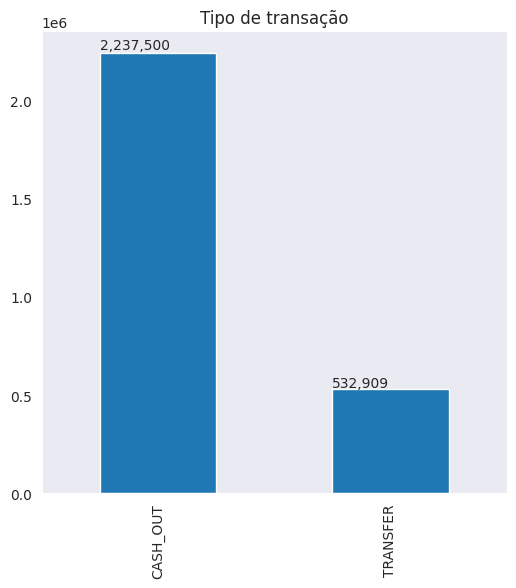

In [ ]:
# Contagem por tipo de transação
ax = tmp.type.value_counts().plot(kind='bar', title="Tipo de transação", figsize=(6,6))
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

plt.show()

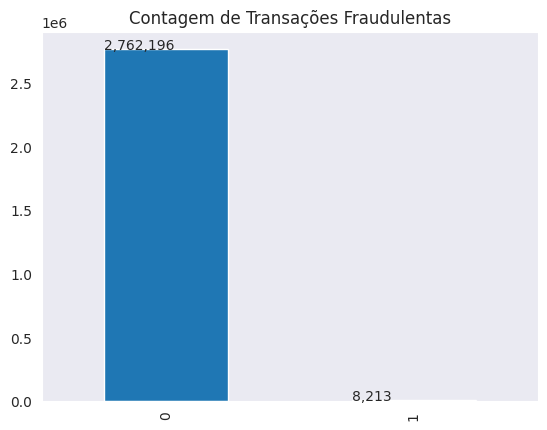

In [ ]:
ax = pd.value_counts(tmp['isFraud'], sort = True).sort_index().plot(kind='bar', title="Contagem de Transações Fraudulentas")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
plt.show()

Com base no conjunto de dados, as variáveis numéricas estão bastante distorcidas (skewed).

Neste caso, tentarei escalá-las com dois métodos e compará-los no gráfico.

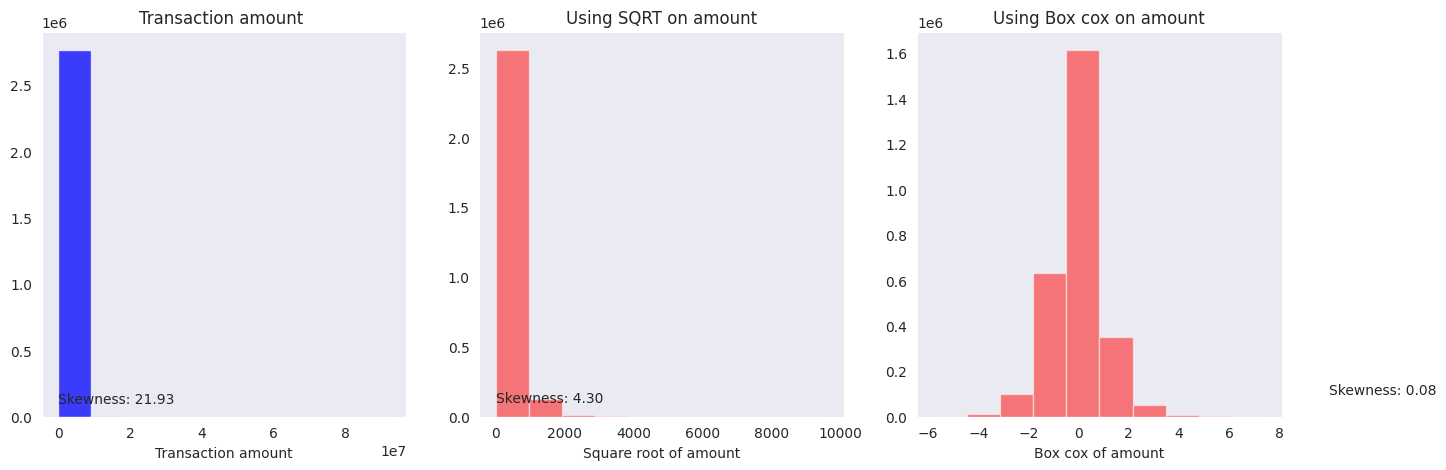

In [ ]:
tmp['amount_boxcox'] = preprocessing.scale(boxcox(tmp['amount']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131)
plt.hist(tmp['amount'] ,facecolor='blue',alpha=0.75)
plt.xlabel("Transaction amount")
plt.title("Transaction amount ")
plt.text(10,100000,"Skewness: {0:.2f}".format(skew(tmp['amount'])))

figure.add_subplot(132)
plt.hist(np.sqrt(tmp['amount']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of amount")
plt.title("Using SQRT on amount")
plt.text(10, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(tmp['amount']))))

figure.add_subplot(133)
plt.hist(tmp['amount_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of amount")
plt.title("Using Box cox on amount")
plt.text(10, 100000, "Skewness: {0:.2f}".format(skew(tmp['amount_boxcox'])))

plt.show()

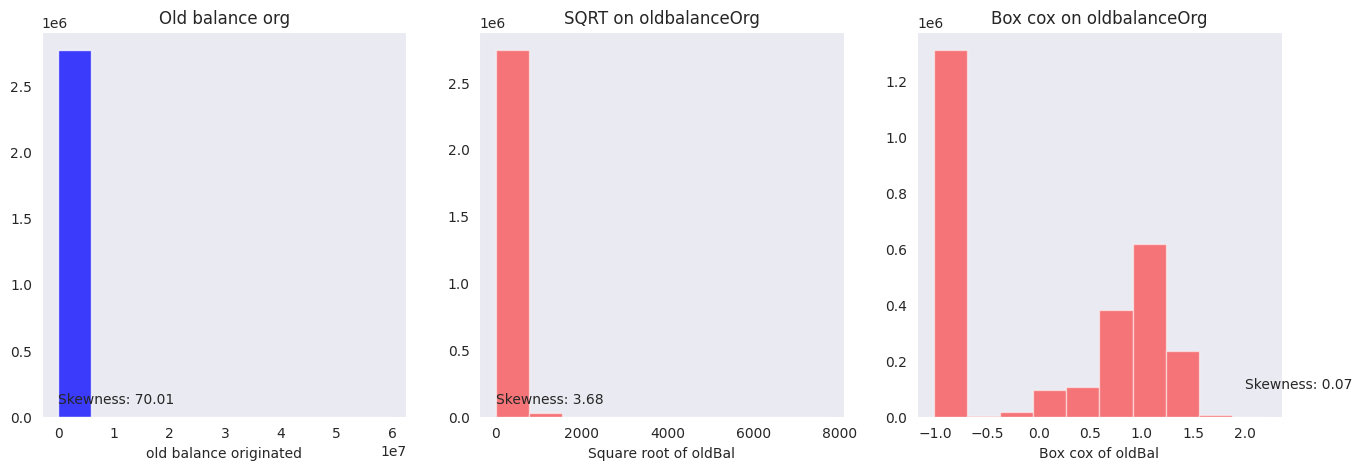

In [ ]:
tmp['oldbalanceOrg_boxcox'] = preprocessing.scale(boxcox(tmp['oldbalanceOrg']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131)
plt.hist(tmp['oldbalanceOrg'] ,facecolor='blue',alpha=0.75)
plt.xlabel("old balance originated")
plt.title("Old balance org")
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(tmp['oldbalanceOrg'])))


figure.add_subplot(132)
plt.hist(np.sqrt(tmp['oldbalanceOrg']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of oldBal")
plt.title("SQRT on oldbalanceOrg")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(tmp['oldbalanceOrg']))))


figure.add_subplot(133)
plt.hist(tmp['oldbalanceOrg_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of oldBal")
plt.title("Box cox on oldbalanceOrg")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(tmp['oldbalanceOrg_boxcox'])))

plt.show()

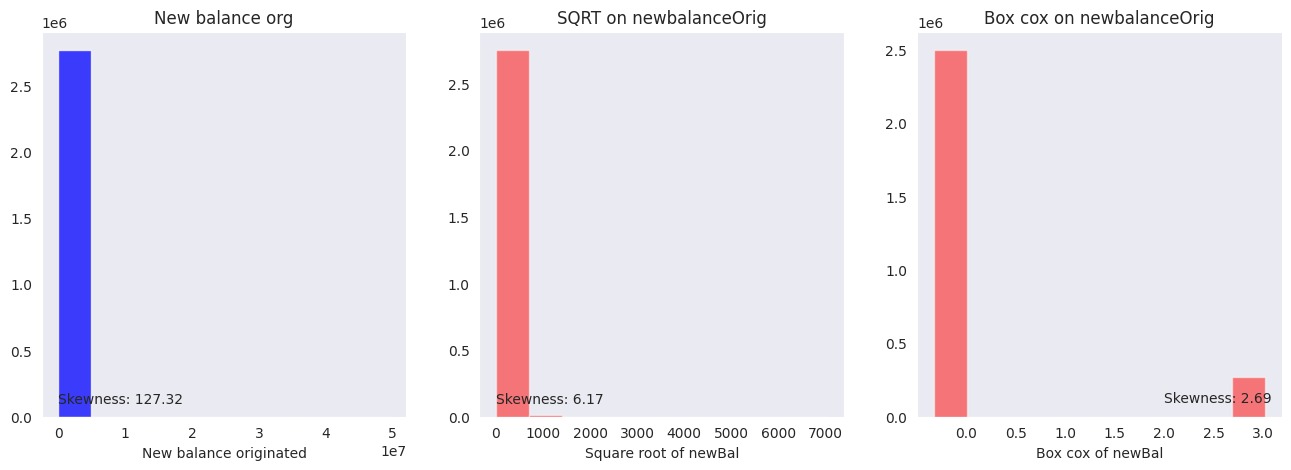

In [ ]:
tmp['newbalanceOrg_boxcox'] = preprocessing.scale(boxcox(tmp['newbalanceOrig']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131)
plt.hist(tmp['newbalanceOrig'] ,facecolor='blue',alpha=0.75)
plt.xlabel("New balance originated")
plt.title("New balance org")
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(tmp['newbalanceOrig'])))


figure.add_subplot(132)
plt.hist(np.sqrt(tmp['newbalanceOrig']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of newBal")
plt.title("SQRT on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(tmp['newbalanceOrig']))))

figure.add_subplot(133)
plt.hist(tmp['newbalanceOrg_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of newBal")
plt.title("Box cox on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(tmp['newbalanceOrg_boxcox'])))

plt.show()

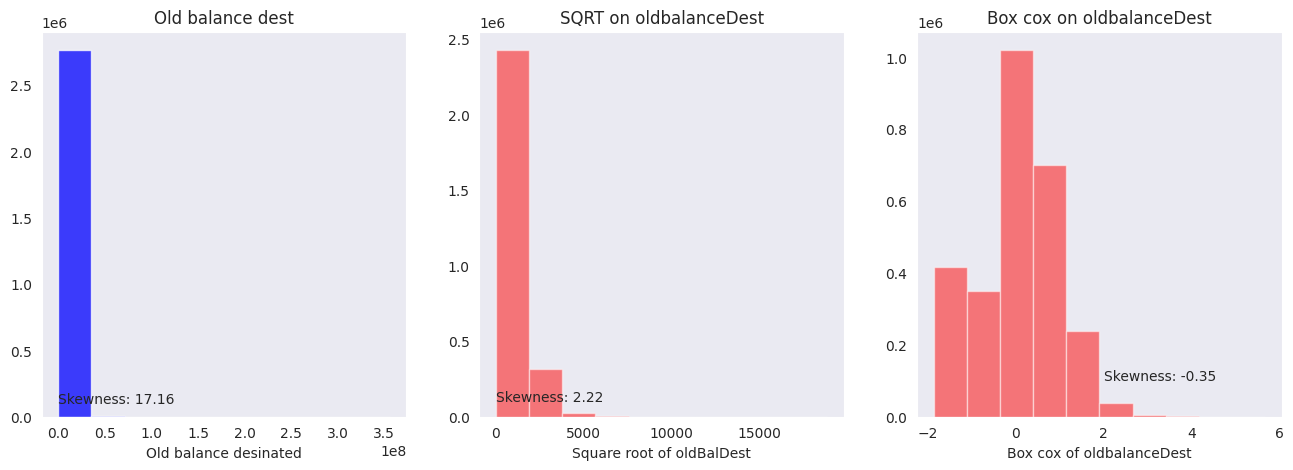

In [ ]:
tmp['oldbalanceDest_boxcox'] = preprocessing.scale(boxcox(tmp['oldbalanceDest']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131)
plt.hist(tmp['oldbalanceDest'] ,facecolor='blue',alpha=0.75)
plt.xlabel("Old balance desinated")
plt.title("Old balance dest")
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(tmp['oldbalanceDest'])))


figure.add_subplot(132)
plt.hist(np.sqrt(tmp['oldbalanceDest']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of oldBalDest")
plt.title("SQRT on oldbalanceDest")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(tmp['oldbalanceDest']))))

figure.add_subplot(133)
plt.hist(tmp['oldbalanceDest_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of oldbalanceDest")
plt.title("Box cox on oldbalanceDest")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(tmp['oldbalanceDest_boxcox'])))

plt.show()

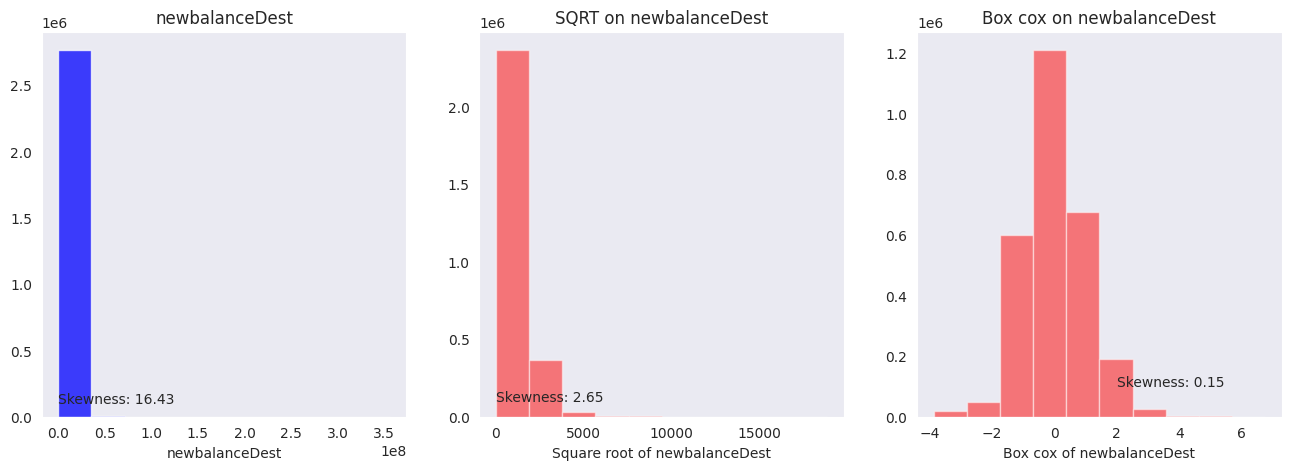

In [ ]:
tmp['newbalanceDest_boxcox'] = preprocessing.scale(boxcox(tmp['newbalanceDest']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131)
plt.hist(tmp['newbalanceDest'] ,facecolor='blue',alpha=0.75)
plt.xlabel("newbalanceDest")
plt.title("newbalanceDest")
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(tmp['newbalanceDest'])))


figure.add_subplot(132)
plt.hist(np.sqrt(tmp['newbalanceDest']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of newbalanceDest")
plt.title("SQRT on newbalanceDest")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(tmp['newbalanceDest']))))

figure.add_subplot(133)
plt.hist(tmp['newbalanceDest_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of newbalanceDest")
plt.title("Box cox on newbalanceDest")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(tmp['newbalanceDest_boxcox'])))

plt.show()

In [ ]:
print("A porcentagem de transações fraudulentas no conjunto de dados filtrado é de: {0:.4f}%".format((len(tmp[tmp.isFraud == 1])/len(tmp)) * 100))

A porcentagem de transações fraudulentas no conjunto de dados filtrado é de: 0.2965%


Menos de 1% de fraudes reais. Isso torna os dados muito desequilibrados.

Iremos utilizar um método de subamostragem

Vou subamostrar o conjunto de dados criando uma proporção de 50-50 selecionando aleatoriamente uma quantidade 'x' de amostras da classe majoritária, onde 'x' é o número total de registros da classe minoritária.

>Remover algumas colunas

In [ ]:
# Remove as colunas especificadas do DataFrame 'tmp'
tmp.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount', 'type'], axis=1, inplace=True)

# Define X como todas as colunas em 'tmp' exceto a coluna 'isFraud'
X = tmp.loc[:, tmp.columns != 'isFraud']

# Define y como a coluna 'isFraud' em 'tmp'
y = tmp.loc[:, tmp.columns == 'isFraud']

In [ ]:
# Número de pontos de dados na classe minoritária
numero_registros_fraude = len(tmp[tmp.isFraud == 1])
indices_fraude = tmp[tmp.isFraud == 1].index.values

# Escolhendo os índices das classes normais
indices_normais = tmp[tmp.isFraud == 0].index

# Dos índices que escolhemos, selecione aleatoriamente "x" número (x - mesmo que o total de fraudes)
indices_normais_aleatorios = np.random.choice(indices_normais, numero_registros_fraude, replace=False)
indices_normais_aleatorios = np.array(indices_normais_aleatorios)

# Concatenando os 2 conjuntos de índices
indices_undersample = np.concatenate([indices_fraude, indices_normais_aleatorios])
dados_undersample = tmp.iloc[indices_undersample, :]

X_undersample = dados_undersample.loc[:, dados_undersample.columns != 'isFraud']
y_undersample = dados_undersample.loc[:, dados_undersample.columns == 'isFraud']

# Exibindo a proporção
print("Porcentagem de transações normais: ", len(dados_undersample[dados_undersample.isFraud == 0])/len(dados_undersample))
print("Porcentagem de transações fraudulentas: ", len(dados_undersample[dados_undersample.isFraud == 1])/len(dados_undersample))
print("Número total de transações nos dados amostrados: ", len(dados_undersample))


Porcentagem de transações normais:  0.5
Porcentagem de transações fraudulentas:  0.5
Número total de transações nos dados amostrados:  16426


#Classificador de regressão logística - Subamostragem dos dados

In [ ]:
from sklearn.model_selection import train_test_split

# Conjunto de dados completo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Número de transações no conjunto de treinamento: ", format(len(X_train), ',d'))
print("Número de transações no conjunto de teste: ", format(len(X_test), ',d'))
print("Número total de transações: ", format(len(X_train) + len(X_test), ',d'))

# Conjunto de dados subamostrado
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size=0.3
                                                                                                   ,random_state=0)
print("")
print("Número de transações no conjunto de treinamento (subamostrado): ", format(len(X_train_undersample), ',d'))
print("Número de transações no conjunto de teste (subamostrado): ", format(len(X_test_undersample), ',d'))
print("Número total de transações (subamostrado): ", format(len(X_train_undersample) + len(X_test_undersample), ',d'))


Número de transações no conjunto de treinamento:  1,939,286
Número de transações no conjunto de teste:  831,123
Número total de transações:  2,770,409

Número de transações no conjunto de treinamento (subamostrado):  11,498
Número de transações no conjunto de teste (subamostrado):  4,928
Número total de transações (subamostrado):  16,426


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report


def printing_Kfold_scores(x_train_data, y_train_data, kfoldnum, c_array):
    # Define a divisão K-Fold
    fold = KFold(n_splits=kfoldnum, shuffle=False)

    # Cria um DataFrame vazio para armazenar os resultados
    results_table = pd.DataFrame(index=range(len(c_array)), columns=['C_parameter', 'Mean recall score', 'Mean precision score'])
    results_table['C_parameter'] = c_array

    j = 0
    for c_param in c_array:
        print('-------------------------------------------')
        print('Parâmetro C: ', c_param)
        print('')

        recall_accs = []
        precision_accs = []
        for iteration, (train_indices, test_indices) in enumerate(fold.split(x_train_data), start=1):
            # Configura o modelo de regressão logística com parâmetros específicos
            lr = LogisticRegression(C=c_param, penalty='l1', solver='liblinear')
            lr.fit(x_train_data.iloc[train_indices], y_train_data.iloc[train_indices].values.ravel())
            y_pred_undersample = lr.predict(x_train_data.iloc[test_indices])

            # Calcula as métricas de recall e precisão
            recall_acc = recall_score(y_train_data.iloc[test_indices], y_pred_undersample)
            recall_accs.append(recall_acc)

            precision_acc = precision_score(y_train_data.iloc[test_indices], y_pred_undersample)
            precision_accs.append(precision_acc)
            print("Iteração {}: recall score = {:.4f}, precision score = {:.4f}".format(iteration, recall_acc, precision_acc))

        # Calcula a média das métricas de recall e precisão
        results_table.loc[j, 'Mean recall score'] = np.mean(recall_accs)
        results_table.loc[j, 'Mean precision score'] = np.mean(precision_accs)
        j += 1
        print('')
        print('Média do recall score {:.4f}'.format(np.mean(recall_accs)))
        print('Média do precision score {:.4f}'.format(np.mean(precision_accs)))
        print('')

    # Encontra o melhor parâmetro C baseado no recall médio
    results_table['Mean recall score'] = pd.to_numeric(results_table['Mean recall score'])
    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    print('*********************************************************************************')
    print('Melhor modelo escolhido a partir da validação cruzada tem o parâmetro C = ', best_c)
    print('*********************************************************************************')

    return best_c



>Vamos encontrar o valor de C a ser utilizado.

In [ ]:
c_param_range = [0.001, 0.01, 0.1, 1, 10, 100]
k_fold = 5
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample, k_fold, c_param_range)

-------------------------------------------
Parâmetro C:  0.001

Iteração 1: recall score = 0.9956, precision score = 0.6636
Iteração 2: recall score = 0.9913, precision score = 0.6674
Iteração 3: recall score = 0.9955, precision score = 0.6517
Iteração 4: recall score = 0.9899, precision score = 0.6849
Iteração 5: recall score = 0.9940, precision score = 0.6773

Média do recall score 0.9933
Média do precision score 0.6690

-------------------------------------------
Parâmetro C:  0.01

Iteração 1: recall score = 0.9588, precision score = 0.8409
Iteração 2: recall score = 0.9514, precision score = 0.8476
Iteração 3: recall score = 0.9626, precision score = 0.8282
Iteração 4: recall score = 0.9529, precision score = 0.8674
Iteração 5: recall score = 0.9582, precision score = 0.8450

Média do recall score 0.9568
Média do precision score 0.8458

-------------------------------------------
Parâmetro C:  0.1

Iteração 1: recall score = 0.9632, precision score = 0.9001
Iteração 2: recall sco

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada configurando `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Matriz de confusão normalizada")
    else:
        #print('Matriz de confusão, sem normalização')
        pass

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')


Métrica de Recall no conjunto de teste: 0.9742


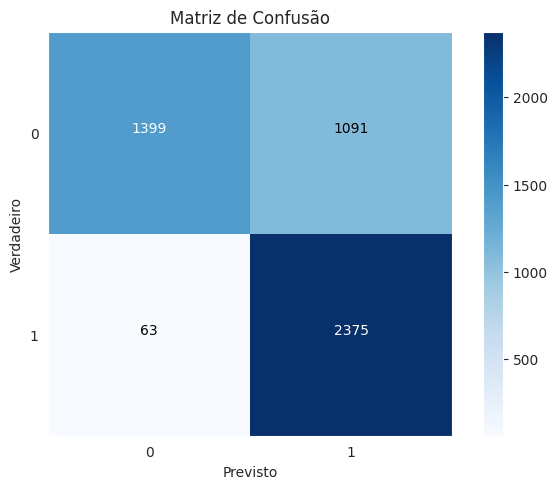

In [ ]:
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)


# Calcula a matriz de confusão
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)

print("Métrica de Recall no conjunto de teste: {0:.4f}".format(cnf_matrix[1,1] / (cnf_matrix[1,0] + cnf_matrix[1,1])))

# Plota a matriz de confusão não normalizada
nomes_classes = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=nomes_classes
                      , title='Matriz de Confusão')
plt.show()


In [ ]:
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)


# Calcula a matriz de confusão
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print("Métrica de Recall no conjunto de teste: ", cnf_matrix[1,1] / (cnf_matrix[1,0] + cnf_matrix[1,1]))


Métrica de Recall no conjunto de teste:  0.9793103448275862


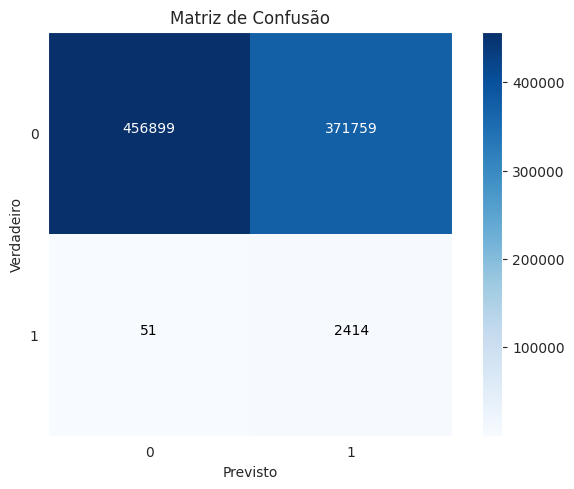

In [ ]:
# Plota a matriz de confusão não normalizada
nomes_classes = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=nomes_classes
                      , title='Matriz de Confusão')
plt.show()

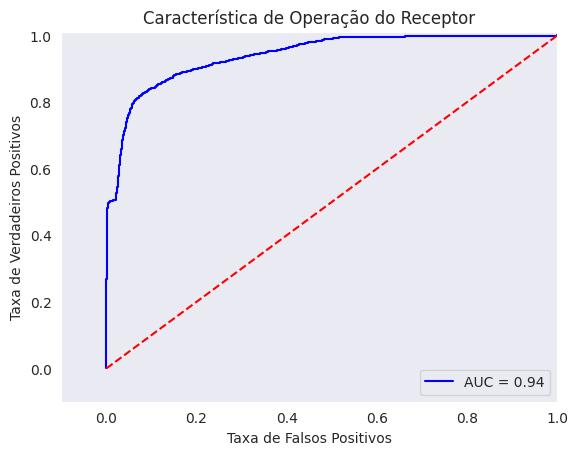

In [ ]:
# CURVA ROC
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')
y_pred_undersample_score = lr.fit(X_train_undersample, y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(), y_pred_undersample_score)
roc_auc = auc(fpr, tpr)

# Plotando a Curva ROC
plt.title('Característica de Operação do Receptor')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([-0.1, 1.01])
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()
